[ 0.          2.02020202  4.04040404  6.06060606  8.08080808 10.1010101
 12.12121212 14.14141414 16.16161616 18.18181818]


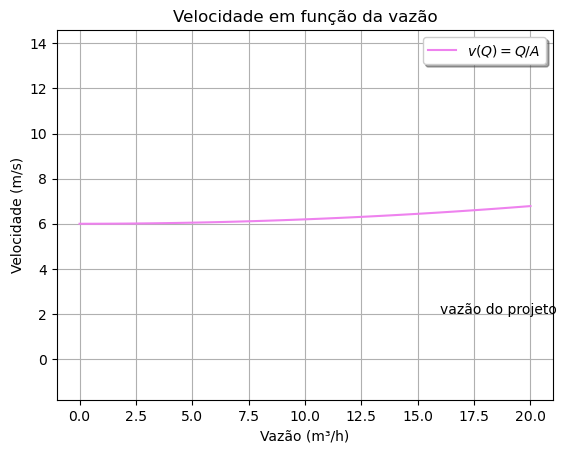

In [7]:
#Velocidade em função da vazão


import numpy as np
import matplotlib.pyplot as plt




a = 0
b = 20
N = 100
x = np.linspace(a,b,N)
y = 6+(((x/3600)/0.001416)**2)/(2*9.81)
print(x[range(0,N,10)])
# If there is a problem: use print(x[list(range(0,N,10))]) instead.


plt.figure(1)

#Cor da curva e texto (Legenda)
plt.plot(x,y,color = "violet", label = "$v(Q)=Q/A$")

 # plt.plot(2*x,-y,color = "red", label = "$g(x)=-x/2$")

#Limite inicial do grafico
plt.xlim([-1,1])

#Proporção
plt.axis("equal")

#Titulo do eixo y
plt.ylabel("Velocidade (m/s)")

#Titulo do eixo x
plt.xlabel("Vazão (m³/h)")

#Titulo do grafico
plt.title("Velocidade em função da vazão")

#Grade do grafico
plt.grid(True)

#Posição da legenda
plt.legend(loc = "upper right", shadow = True)

#Nota à direita, mais abaixo do grafico
plt.annotate('vazão do projeto', xy=(15, 3), xytext=(16, 2))

#Plotar  gráfico
plt.show()


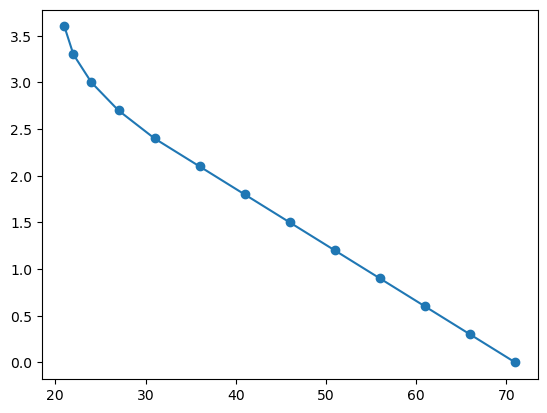

In [38]:
# Read in the data
p1000 = pd.read_csv('p1000.csv')


# Write equation for a line
predicted_Q = 10 * p1000.H + 45

# Create the plot
plt.scatter(p1000.H, p1000.Q)
plt.plot(p1000.H, p1000.Q)
plt.show()

Intercept    4.641600
H           -0.066801
dtype: float64


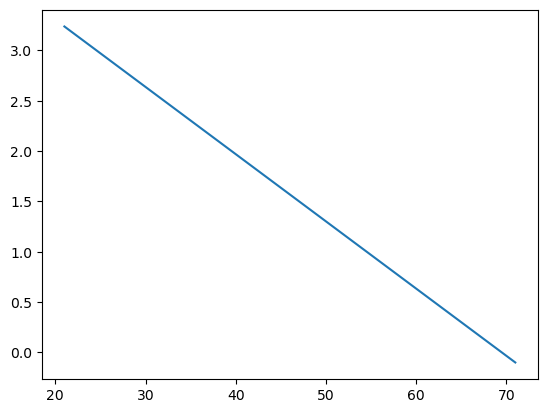

In [41]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
p1000 = pd.read_csv('p1000.csv')

# Fit the model
model = sm.OLS.from_formula('Q ~ H', p1000)
results = model.fit()

# Print the model params
print(results.params)

# Calculate and print `pred_3hr` here:
#pred_3hr = results.params[1]*3 + results.params[0]
#print(pred_3hr)

# Calculate and print `pred_5hr` here:
#newdata = {"hours_studied":[5]}
#pred_5hr = results.predict(newdata)
#print(pred_5hr)

a=results.params[1]
b=results.params[0]




# Write equation for a line
predicted_Q = a * p1000.H + b

# Create the plot
#plt.scatter(p1000.H, predicted_Q)
plt.plot(p1000.H, predicted_Q)
plt.show()

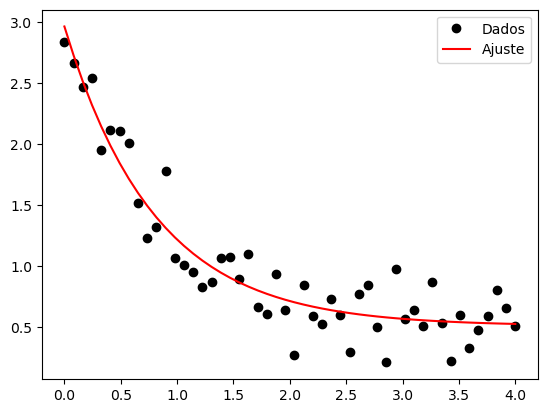

In [42]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define a função a ser ajustada
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Gerar dados sintéticos
x = np.linspace(0, 4, 50)
y = func(x, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=x.size)
ydata = y + y_noise

# Ajustar a curva usando a função curve_fit do SciPy
popt, pcov = curve_fit(func, x, ydata)

# Plotar os resultados
plt.figure()
plt.plot(x, ydata, 'ko', label="Dados")
plt.plot(x, func(x, *popt), 'r-', label="Ajuste")
plt.legend()
plt.show()

Parâmetros: a=72.230769, b=-20.477855, c=1.592852


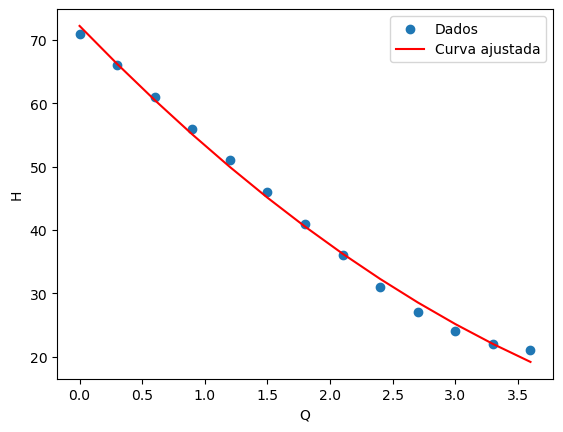

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Leitura dos dados
df = pd.read_csv('p1000.csv')

# Definição da função a ser ajustada
def func(Q, a, b, c):
    return a + b*Q + c*(Q**2)

# Ajuste da curva usando a função curve_fit
popt, pcov = curve_fit(func, df['Q'], df['H'])

# Extração dos parâmetros a, b e c
a, b, c = popt
print("Parâmetros: a={:.6f}, b={:.6f}, c={:.6f}".format(a, b, c))

# Plotagem dos dados e da curva ajustada
plt.scatter(df['Q'], df['H'], label='Dados')
plt.plot(df['Q'], func(df['Q'], a, b, c), 'r-', label='Curva ajustada')
plt.xlabel('Q')
plt.ylabel('H')
plt.legend()
plt.show()


In [ ]:
class PerdaDeCarga:
    def __init__(self):
        self.dados = {
            "1\"": {
                "mca/100": {"0.1": 2.5, "0.2": 10.1, "0.3": 22.4},
                "Curva 90°": {"0.1": 3.2, "0.2": 13.8, "0.3": 32.7},
                "Valv./Retenção": {"0.1": 2.9, "0.2": 11.7, "0.3": 27.3},
                "Valv./Gaveta": {"0.1": 2.9, "0.2": 11.7, "0.3": 27.3}
            },
            "2\"": {
                "mca/100": {"0.1": 1.2, "0.2": 4.8, "0.3": 10.7},
                "Curva 90°": {"0.1": 1.6, "0.2": 7.1, "0.3": 16.8},
                "Valv./Retenção": {"0.1": 1.5, "0.2": 6.3, "0.3": 14.7},
                "Valv./Gaveta": {"0.1": 1.5, "0.2": 6.3, "0.3": 14.7}
            }
        }
    
    def get_perda_de_carga(self, tipo_conexao, vazao, diametro):
        if diametro in self.dados:
            if tipo_conexao in self.dados[diametro]:
                curva = self.dados[diametro][tipo_conexao]
                if vazao in curva:
                    return curva[vazao]
                else:
                    raise ValueError("Vazão não encontrada")
            else:
                raise ValueError("Tipo de conexão não encontrado")
        else:
            raise ValueError("Diâmetro não encontrado")


In [45]:
import csv

# Dados de exemplo
dados = [
    ["tipo_conexao", "diametro", "vazao", "perda_de_carga"],
    ["Curva 90°", "1\"", "0.1", 3.2],
    ["Curva 90°", "1\"", "0.2", 13.8],
    ["Curva 90°", "1\"", "0.3", 32.7],
    ["Curva 90°", "2\"", "0.1", 5.5],
    ["Curva 90°", "2\"", "0.2", 22.1],
    ["Curva 90°", "2\"", "0.3", 49.7],
    ["Valv./Retenção", "1\"", "0.1", 2.9],
    ["Valv./Retenção", "1\"", "0.2", 11.7],
    ["Valv./Retenção", "1\"", "0.3", 27.3],
    ["Valv./Retenção", "2\"", "0.1", 4.8],
    ["Valv./Retenção", "2\"", "0.2", 19.4],
    ["Valv./Retenção", "2\"", "0.3", 43.4],
]

# Cria o arquivo CSV
with open('dados.csv', mode='w', newline='') as arquivo_csv:
    escritor = csv.writer(arquivo_csv, delimiter=',')
    for linha in dados:
        escritor.writerow(linha)